# Presentation plotting analyses

In [368]:
import qiime2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from qiime2.plugins import feature_table, fragment_insertion, feature_classifier, metadata, empress, songbird

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import seaborn as sns
%matplotlib inline

In [360]:
# Data and results directories
data_dir = '../data/full/2020_05_11'
results_dir = '../results/full/2020_05_15'
table_dir = '{}/feature_tables'.format(results_dir)
tree_dir = '{}/fragment_insertion'.format(results_dir)
diversity_dir = '{}/diversity'.format(results_dir)
diff_dir = '{}/differential_abundance'.format(results_dir)
tree_dir = '{}/fragment_insertion'.format(results_dir)

## SLIDE 2: Microbiome-exercise studies
Data: local `doc`
#### TODO: Ask Bod about how best to show this and what else to include? Also if what I did makes sense

In [361]:
all_ = pd.read_csv('../doc/microbiome_exercise_articles_refined.csv', skiprows=1, index_col=0)
human = pd.read_csv('../doc/microbiome_exercise_articles_human.csv', skiprows=1, index_col=0)
history = pd.read_csv('../doc/PubMedSearchHistory.csv')

In [362]:
article_df = pd.concat([all_, human], axis=1).dropna()
article_df.columns = ["All", "Human"]

Text(0, 0.5, 'Number of publications')

<Figure size 864x576 with 0 Axes>

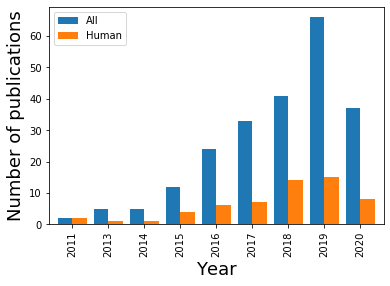

In [474]:
ax = plt.figure(figsize=(12,8))
ax = article_df.plot.bar(width=0.8)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel('Number of publications', fontsize=18)

## SLIDE 3: Gut microbiome and importance in disease (IBD)
Data: images and other IBD stats
#### TODO: Ask Bod for help and if slide is useful

## SLIDE 4: Physical activity and microbiome
Data: Mostly words
#### TODO: Go over with Bod

## SLIDE 5: AGP overview
Data: local `doc`

In [77]:
%%bash
redbiom search metadata "exercise_frequency where qiita_study_id == 10317" > ../doc/agp.ids
redbiom summarize metadata-category --category "exercise_frequency" --dump > ../doc/exercise_frequency.ids

In [475]:
with open('../doc/agp.ids', 'r') as f:
    agp_ids = [line.rstrip() for line in f.readlines()]
exercise = pd.read_csv('../doc/exercise_frequency.ids', sep='\t', index_col=0)

In [481]:
valids = ['Never', 'Rarely (a few times/month)', 'Occasionally (1-2 times/week)', 'Regularly (3-5 times/week)', 'Daily']
exercise_drops = exercise[exercise["exercise_frequency"].isin(valids)]
exercise_drops["exercise_frequency"].value_counts()

Regularly (3-5 times/week)       9270
Occasionally (1-2 times/week)    6217
Daily                            5133
Rarely (a few times/month)       3132
Never                             806
Name: exercise_frequency, dtype: int64

[Text(0, 0, 'Never (n=806)'),
 Text(0, 0, 'Rarely (n=3132)'),
 Text(0, 0, 'Occasionally (n=6217)'),
 Text(0, 0, 'Regularly (n=9270)'),
 Text(0, 0, 'Daily (n=5133)')]

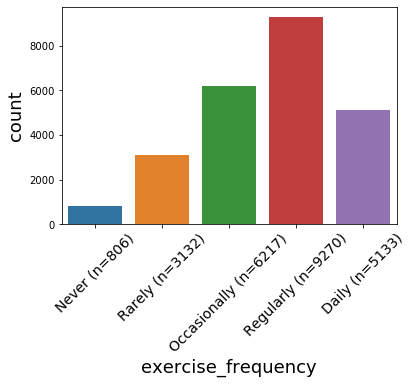

In [482]:
ax = sns.countplot(x='exercise_frequency', data=exercise_drops, order=['Never', 'Rarely (a few times/month)', 'Occasionally (1-2 times/week)', 
                                                                       'Regularly (3-5 times/week)', 'Daily'])
ax.set_xticklabels(["Never (n=806)", "Rarely (n=3132)", "Occasionally (n=6217)", "Regularly (n=9270)", "Daily (n=5133)"], rotation=45)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

## SLIDE 6: Aims of project
data: my brain
#### TODO: Run over with Bod, make sure questions we are asking make sense with what we actually did

## SLIDE 7: Data preprocessing overview
data: lucidchart
#### TODO: Probably okay for now, may add in things in or clean up later

## SLIDE 8: Feature table analysis pipelines
data: lucidchart
#### TODO: Probably will be one of the last slides to come together

## SLIDE 9: Feature table overview
data: local `insertion-table.qza`
#### TODO: Make sure this is something useful to show

In [489]:
filtered_table = qiime2.Artifact.load('{}/insertion-table.qza'.format(table_dir))
meta_data = qiime2.Metadata.load('{}/cleaned-filtered-metadata.tsv'.format(data_dir))

In [484]:
filtered_df = feature_filter.filtered_table.view(pd.DataFrame)

In [485]:
counts = filtered_df.sum(axis=0)

In [486]:
print("Number of zero count features %d" % (counts == 0).sum())
print("Number of singleton features %d" % (counts == 1).sum())
print("Number of doubleton features %d" % (counts == 2).sum())
print("Number of features with a count of >2 %d" % (counts > 2).sum())

Number of zero count features 0
Number of singleton features 0
Number of doubleton features 0
Number of features with a count of >2 85716


In [490]:
meta_data_df = meta_data.to_dataframe()
meta_data_df["exercise_frequency"].value_counts()

Regularly (3-5 times/week)       2886
Occasionally (1-2 times/week)    1705
Daily                            1458
Rarely (a few times/month)        716
Never                             170
Name: exercise_frequency, dtype: int64

[Text(0, 0, 'Never (n=170)'),
 Text(0, 0, 'Rarely (n=716)'),
 Text(0, 0, 'Occasionally (n=1705)'),
 Text(0, 0, 'Regularly (n=2886)'),
 Text(0, 0, 'Daily (n=1458)')]

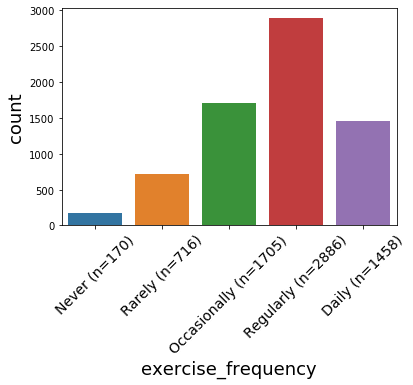

In [493]:
ax = sns.countplot(x='exercise_frequency', data=meta_data_df, order=['Never', 'Rarely (a few times/month)', 'Occasionally (1-2 times/week)', 
                                                                       'Regularly (3-5 times/week)', 'Daily'])
ax.set_xticklabels(["Never (n=170)", "Rarely (n=716)", "Occasionally (n=1705)", "Regularly (n=2886)", "Daily (n=1458)"], rotation=45)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)

## SLIDE 10: Taxonomic classification
data: local `taxonomy`
#### TODO: Go over with Bod

In [379]:
tax_dir = '{}/taxonomy'.format(results_dir)

In [391]:
pretrained_taxonomy = qiime2.Artifact.load('{}/pretrained-taxonomy.qza'.format(tax_dir))
bespoke_taxonomy = qiime2.Artifact.load('{}/bespoke-taxonomy.qza'.format(tax_dir))

In [392]:
pretrained_df = pretrained_taxonomy.view(pd.DataFrame)
bespoke_df = bespoke_taxonomy.view(pd.DataFrame)

In [395]:
pretrained_df.columns = ["Pretrained_taxon", "Pretrained_confidence"]
bespoke_df.columns = ["Bespoke_taxon", "Bespoke_confidence"]

In [402]:
taxonomy_df = pretrained_df.merge(bespoke_df, left_index=True, right_index=True)

In [403]:
taxonomy_df = taxonomy_df.astype({"Pretrained_confidence":"float64", "Bespoke_confidence":"float64"})

In [405]:
print("Percentage of features classified with pretrained method at > 90%% confidence: %.2f%%" % (100*(taxonomy_df["Pretrained_confidence"] > 0.90).sum()/len(taxonomy_df)))
print("Percentage of features classified with bespoke method at > 90%% confidence: %.2f%%" % (100*(taxonomy_df["Bespoke_confidence"] > 0.90).sum()/len(taxonomy_df)))

Percentage of features classified with pretrained method at > 90% confidence: 77.64%
Percentage of features classified with bespoke method at > 90% confidence: 80.57%


In [429]:
pretrained_counts = {"U":0, "k":0, "p":0, "c":0, "o":0, "f":0, "g":0, "s":0}
for classification in taxonomy_df["Pretrained_taxon"].values:
    if classification == "Unassgined":
        pretrained_counts["U"] += 1
        continue
    taxons = classification.split('; ')
    for i, cl in enumerate(taxons):
        if i > 0 and len(cl) < 4:
            taxon_counts[taxons[i-1][0]] += 1
            break
        if i == len(taxons)-1:
            pretrained_counts[taxons[len(taxons)-1][0]] += 1
            
bespoke_counts = {"U":0, "k":0, "p":0, "c":0, "o":0, "f":0, "g":0, "s":0}
for classification in taxonomy_df["Bespoke_taxon"].values:
    if classification == "Unassgined":
        bespoke_counts["U"] += 1
        continue
    taxons = classification.split('; ')
    for i, cl in enumerate(taxons):
        if i > 0 and len(cl) < 4:
            taxon_counts[taxons[i-1][0]] += 1
            break
        if i == len(taxons)-1:
            bespoke_counts[taxons[len(taxons)-1][0]] += 1

In [449]:
counts_df = pd.concat([pd.Series(pretrained_counts), pd.Series(bespoke_counts)], axis=1, join='inner')
counts_df.columns = ["Pretrained", "Bespoke"]
frac_df = counts_df.apply(lambda x: 100 * x / x.sum(), axis=0)

[Text(0, 0, 'Unassigned'),
 Text(0, 0, 'Kingdom'),
 Text(0, 0, 'Phylum'),
 Text(0, 0, 'Class'),
 Text(0, 0, 'Order'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Genus'),
 Text(0, 0, 'Species')]

<Figure size 864x576 with 0 Axes>

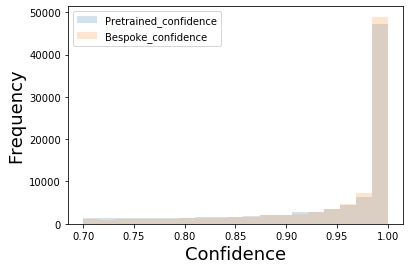

<Figure size 864x576 with 0 Axes>

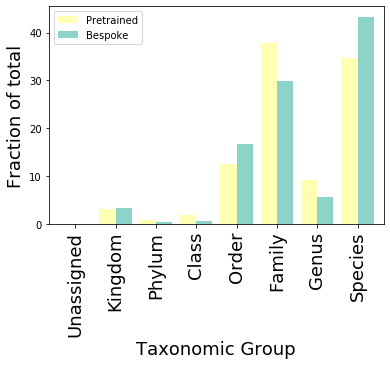

In [462]:
ax1 = plt.figure(figsize=(12,8))
ax1 = taxonomy_df.plot.hist(alpha=0.2, bins=bins)
ax1.set_xlabel("Confidence", fontsize=18)
ax1.set_ylabel("Frequency", fontsize=18)

set_three = cm.get_cmap('Set3', 20)
ax2 = plt.figure(figsize=(12,8))
ax2 = frac_df.plot.bar(color=[set_three(np.random.random()) for i in range(len(taxon_frac))], width=0.8)
ax2.set_xlabel("Taxonomic Group", fontsize=18)
ax2.set_ylabel("Fraction of total", fontsize=18)
ax2.set_xticklabels(["Unassigned", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"], fontsize=18)

## SLIDES 11,12: Alpha and beta rarefaction
data: `barnacle`
### IN PROGRESS

## SLIDE 13: Alpha diversity violin plots
data:
#### TODO: Go over with Bod

In [524]:
meta_data = qiime2.Metadata.load('{}/cleaned-filtered-metadata.tsv'.format(data_dir))
meta_data_df = meta_data.to_dataframe()

In [525]:
shannon_vec = qiime2.Artifact.load('{}/shannon-vector.qza'.format(diversity_dir))
faiths_vec = qiime2.Artifact.load('{}/faith-pd-vector.qza'.format(diversity_dir))
otu_vec = qiime2.Artifact.load('{}/otu-vector.qza'.format(diversity_dir))
diversity_df = pd.concat([shannon_vec.view(pd.Series), faiths_vec.view(pd.Series), otu_vec.view(pd.Series)], axis=1)
diversity_meta_df = diversity_df.join(meta_data_df, how='inner')

In [541]:
diversity_meta_df = diversity_meta_df[~diversity_meta_df["shannon"].isna()]
diversity_meta_df["exercise_frequency"].value_counts()

Regularly (3-5 times/week)       2726
Occasionally (1-2 times/week)    1615
Daily                            1378
Rarely (a few times/month)        681
Never                             160
Name: exercise_frequency, dtype: int64

[Text(0, 0, 'Never (n=160)'),
 Text(0, 0, 'Rarely (n=681)'),
 Text(0, 0, 'Occasionally (n=1615)'),
 Text(0, 0, 'Regularly (n=2726)'),
 Text(0, 0, 'Daily (n=1378)')]

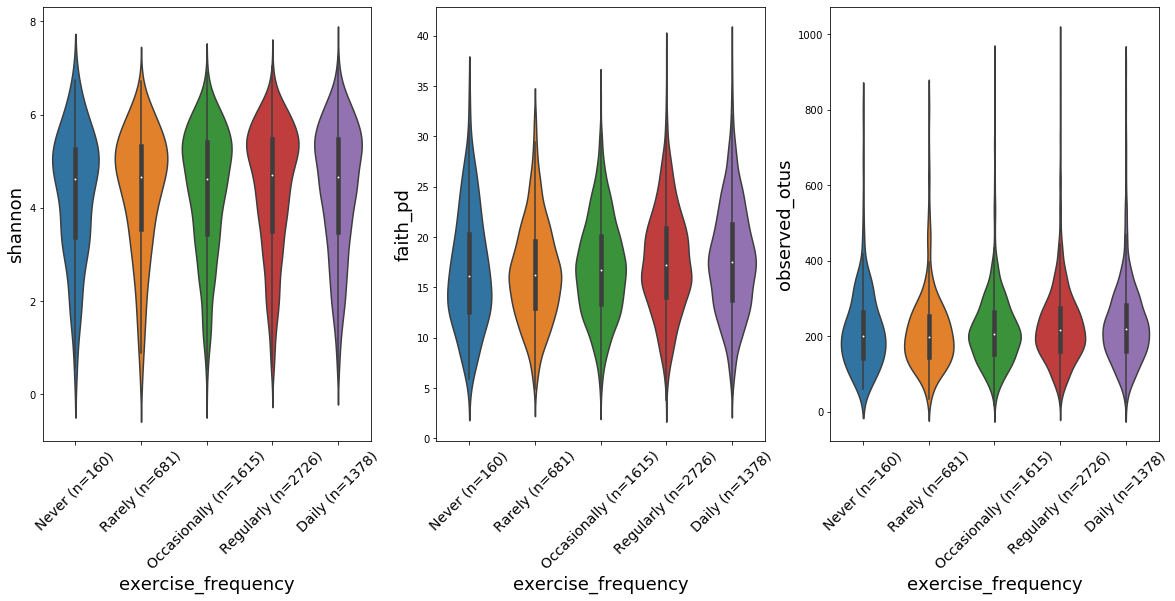

In [542]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))
sns.violinplot(x='exercise_frequency', y='shannon', ax = ax[0], data=diversity_meta_df, order=["Never", "Rarely (a few times/month)", "Occasionally (1-2 times/week)",
                                                                                 "Regularly (3-5 times/week)", "Daily"])
ax[0].set_xticklabels(["Never (n=160)", "Rarely (n=681)", "Occasionally (n=1615)", "Regularly (n=2726)", "Daily (n=1378)"], rotation=45)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=18)
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=18)
ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=14)

sns.violinplot(x='exercise_frequency', y='faith_pd',ax = ax[1], data=diversity_meta_df, order=["Never", "Rarely (a few times/month)", "Occasionally (1-2 times/week)",
                                                                                 "Regularly (3-5 times/week)", "Daily"])
ax[1].set_xticklabels(["Never (n=160)", "Rarely (n=681)", "Occasionally (n=1615)", "Regularly (n=2726)", "Daily (n=1378)"], rotation=45)
ax[1].set_ylabel(ax[1].get_ylabel(), fontsize=18)
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=18)
ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=14)

sns.violinplot(x='exercise_frequency', y='observed_otus',ax = ax[2], data=diversity_meta_df, order=["Never", "Rarely (a few times/month)", "Occasionally (1-2 times/week)",
                                                                                 "Regularly (3-5 times/week)", "Daily"])
ax[2].set_xticklabels(["Never (n=160)", "Rarely (n=681)", "Occasionally (n=1615)", "Regularly (n=2726)", "Daily (n=1378)"], rotation=45)
ax[2].set_ylabel(ax[2].get_ylabel(), fontsize=18)
ax[2].set_xlabel(ax[2].get_xlabel(), fontsize=18)
ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=14)

## SLIDE 14: Beta diversity PCoA

In [250]:
from skbio import DistanceMatrix

uw_dm = qiime2.Artifact.load('{}/uw-unifrac-distance-matrix.qza'.format(diversity_dir)).view(DistanceMatrix)
uw_df = uw_dm.to_data_frame()

In [251]:
uw_df.head()

,10317.000020104.56754,10317.000028711.57900,10317.000013255.60418,10317.000068081.60111,10317.000022101.58699,10317.000052018.58828,10317.000011143.57854,10317.000011036.56878,10317.000105301.66110,10317.000002202.60204,...,10317.000108647.79396,10317.000013614.59891,10317.000068527.59891,10317.000020655.67836,10317.000107550.74745,10317.000047574.60472,10317.000026504.56754,10317.000035441.57180,10317.000009392.60204,10317.000063585.58828
10317.000020104.56754,0.000000,0.724843,0.747448,0.758872,0.582593,0.630135,0.653458,0.638541,0.729428,0.620893,...,0.730217,0.558377,0.576355,0.692950,0.714567,0.575546,0.678564,0.687699,0.637420,0.724836
10317.000028711.57900,0.724843,0.000000,0.591309,0.634243,0.698776,0.681914,0.623563,0.613800,0.563026,0.627500,...,0.599503,0.637126,0.618874,0.602819,0.580733,0.655002,0.620935,0.576550,0.760828,0.637254
10317.000013255.60418,0.747448,0.591309,0.000000,0.612443,0.700068,0.688240,0.587071,0.627214,0.575878,0.648272,...,0.631921,0.659665,0.589456,0.544385,0.554187,0.656549,0.600384,0.540497,0.786709,0.641814
10317.000068081.60111,0.758872,0.634243,0.612443,0.000000,0.715458,0.710801,0.615191,0.631147,0.559342,0.670715,...,0.551506,0.684322,0.609642,0.581300,0.559490,0.671520,0.557909,0.550991,0.789359,0.608086
10317.000022101.58699,0.582593,0.698776,0.700068,0.715458,0.000000,0.549705,0.614751,0.592336,0.691009,0.595650,...,0.721467,0.580172,0.567738,0.617233,0.621976,0.541556,0.641770,0.688962,0.664610,0.705721


In [255]:
cat = meta_data_df["exercise_frequency"].loc[uw_df.index]

In [256]:
from skbio.stats.distance import permanova
permanova(uw_dm, cat)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                    6560
number of groups                  5
test statistic              3.79834
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [258]:
differentials = qiime2.Artifact.load('{}/differentials.qza'.format(diff_dir))
differentials_vis = metadata.visualizers.tabulate(differentials.view(qiime2.Metadata))
differentials_vis.visualization.save('{}/differentials.qzv'.format(diff_dir))

'../results/full/2020_05_15/differential_abundance/differentials.qzv'

In [269]:
songbird_df = differentials.view(pd.DataFrame).join(taxonomy_df, how='inner')

In [270]:
top10 = songbird_df["exercise_frequency[T.Never]"].sort_values()[0:10].index

In [273]:
songbird_df.loc[top10]["Taxon"].values

array(['k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Burkholderiales; f__Comamonadaceae; g__Comamonas; s__',
       'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Enterobacteriaceae; g__Providencia; s__',
       'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Enterobacteriaceae; g__Morganella; s__morganii',
       'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Stenotrophomonas; s__acidaminiphila',
       'k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__S24-7; g__; s__',
       'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Stenotrophomonas; s__geniculata',
       'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Enterobacteriaceae; g__Escherichia; s__coli',
       'k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacteriales; f__Ent

# Adonis

In [278]:
adonis_df = pd.read_csv('{}/adonis.tsv'.format(plot_dir), sep='\t')

In [279]:
adonis_df

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
exercise_frequency,4,3.001783,0.750446,3.808588,0.002312,0.001
sex,4,4.271801,1.067950,5.419955,0.003291,0.001
Residuals,6551,1290.811686,0.197040,NaN,0.994397,NaN
Total,6559,1298.085269,NaN,NaN,1.000000,NaN


## SUPPLEMENTARY

In [ ]:
exercise = pd.read_csv('../doc/exercise_frequency.ids', sep='\t', index_col=0)
exercise.head()